# Problem Set 1

## 1 Stellar Properties

3. Interpolation between data points in Table 2.1

In [1]:
import numpy as np

# Given data points from the table
T_vals = np.array([8180, 11400])  # Temperatures for A5V and B8V
logL_vals = np.array([1.17, 2.34])  # log(L/L☉) values
Mbol_vals = np.array([1.8, -1.1])  # Absolute bolometric magnitude (M_bol)
MV_vals = np.array([1.95, -0.25])  # Absolute visual magnitude (M_V)
BC_vals = np.array([-0.15, -0.80])  # Bolometric correction (BC)
UB_vals = np.array([0.10, -0.34])  # U-B color index
BV_vals = np.array([0.15, -0.11])  # B-V color index

# Temperature for A1V
T_A1V = 9300

# Interpolating all properties for A1V
logL_A1V = np.interp(T_A1V, T_vals, logL_vals)
Mbol_A1V = np.interp(T_A1V, T_vals, Mbol_vals)
MV_A1V = np.interp(T_A1V, T_vals, MV_vals)
BC_A1V = np.interp(T_A1V, T_vals, BC_vals)
UB_A1V = np.interp(T_A1V, T_vals, UB_vals)
BV_A1V = np.interp(T_A1V, T_vals, BV_vals)

# Print results
print(f"Interpolated properties for A1V (T = {T_A1V} K):")
print(f"log(L/L☉) = {logL_A1V:.2f}")
print(f"M_bol = {Mbol_A1V:.2f}")
print(f"M_V = {MV_A1V:.2f}")
print(f"Bolometric Correction (BC) = {BC_A1V:.2f}")
print(f"U-B = {UB_A1V:.2f}")
print(f"B-V = {BV_A1V:.2f}")

Interpolated properties for A1V (T = 9300 K):
log(L/L☉) = 1.58
M_bol = 0.79
M_V = 1.18
Bolometric Correction (BC) = -0.38
U-B = -0.05
B-V = 0.06


4. Radius of the Star

In [3]:
import numpy as np

# Given values
L_sun = 3.828e26  # Solar luminosity in watts
L_bol = 38.02 * L_sun  # Bolometric luminosity of the star
T_eff = 9300  # Effective temperature in Kelvin
sigma = 5.670e-8  # Stefan-Boltzmann constant in W·m^(-2)·K^(-4)

# Compute radius using Stefan-Boltzmann law
R_star = np.sqrt(L_bol / (4 * np.pi * sigma * T_eff**4))

# Convert to solar radii (R_sun = 6.955e8 m)
R_sun = 6.955e8  # Solar radius in meters
R_star_Rsun = R_star / R_sun

print(f"Radius in solar units: {R_star_Rsun:.2f} R_sun")
print(f"Radius of the star: {R_star:.2e} meters")

Radius in solar units: 2.38 R_sun
Radius of the star: 1.65e+09 meters


## 2 Stellar Photometry

1. (1 point) Download the Excel file star spec.data.xlsx from Wattle. The four columns in the file are
the wavelength in Angstrom, the calibrated spectrum of a star with the flux in an arbitrary unit,
and normalised transmission curves of two Gaussian-shaped photometric filters Fblue and Fred. Plot
the stellar spectrum in a graph and show the result in the assignment.

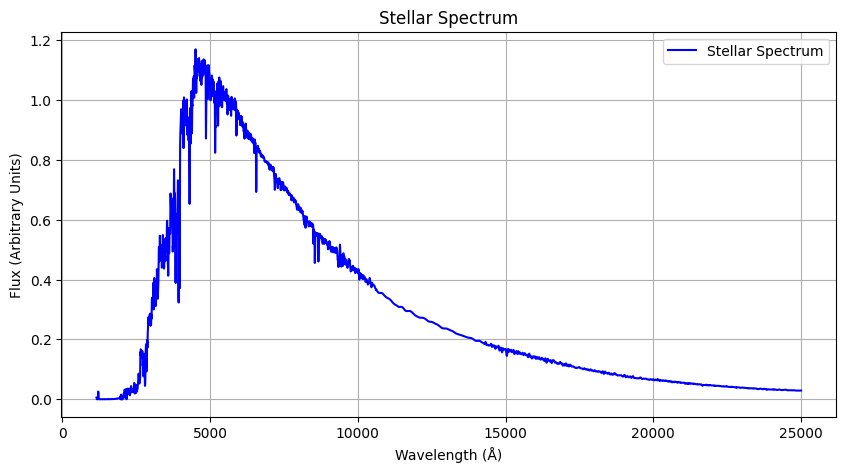

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the Excel file
file_path = "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/star_spec.data.xlsx"  # Update this with the correct path
df = pd.read_excel(file_path)

# Check the first few rows to understand the structure
#print(df.head())

# Extract relevant columns (assuming columns are named as expected)
wavelength = df.iloc[:, 0]  # First column: Wavelength in Angstrom
flux = df.iloc[:, 1]        # Second column: Stellar flux (arbitrary units)

# Plot the stellar spectrum
plt.figure(figsize=(10, 5))
plt.plot(wavelength, flux, color='b', label="Stellar Spectrum")
plt.xlabel("Wavelength (Å)")
plt.ylabel("Flux (Arbitrary Units)")
plt.title("Stellar Spectrum")
plt.legend()
plt.grid(True)
plt.show()

2. (3 points) Use the Planck equation and determine the best-fitting black body curve using a least
squares fitting routine at the observed spectrum. You want to model the red part of the spectrum
(470−900 nm) as accurately as possible. Explain, why the blue part of the stellar spectrum is less
reliable. Show the result. What is the corresponding black body temperature? Guess the spectral
type of the star? Explain your answer.

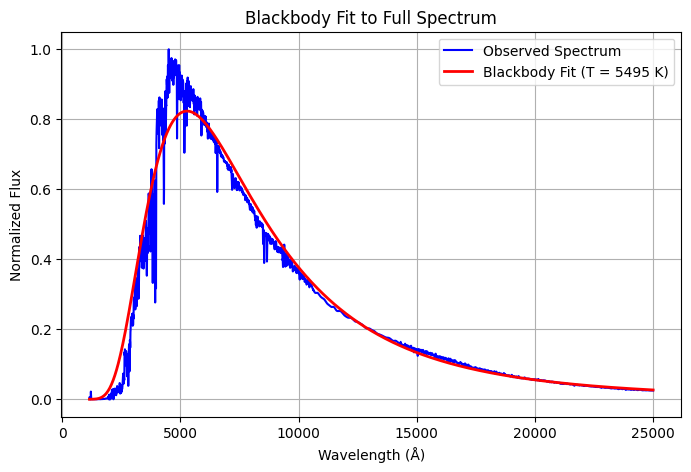

Best-fit Blackbody Temperature: 5495 K


In [4]:
# Constants
h = 6.626e-34  # Planck's constant (J·s)
c = 3.0e8      # Speed of light (m/s)
k_B = 1.38e-23 # Boltzmann's constant (J/K)

# Convert wavelength to meters
wavelength_m = wavelength * 1e-10  

# Normalize flux for fitting
flux_norm = flux / np.max(flux)

# Define Planck Function
def planck(wavelength, T, scale):
    """Planck's blackbody radiation function with scaling factor."""
    B_lambda = (2*h*c**2) / (wavelength**5 * (np.exp((h*c) / (wavelength * k_B * T)) - 1))
    return scale * B_lambda / np.max(B_lambda)  # Normalize for fitting

# Fit the Planck function to the full spectrum
popt, pcov = curve_fit(planck, wavelength_m, flux_norm, p0=[6000, 1], bounds=([2000, 0.1], [50000, 10]))
T_best, scale_best = popt  # Extract best-fit parameters

# Generate Blackbody Curve for Plotting
wavelength_fit = np.linspace(min(wavelength_m), max(wavelength_m), 1000)
blackbody_fit = planck(wavelength_fit, T_best, scale_best)

# Plot Results
plt.figure(figsize=(8, 5))
plt.plot(wavelength_m * 1e10, flux_norm, label="Observed Spectrum", color="blue")
plt.plot(wavelength_fit * 1e10, blackbody_fit, label=f"Blackbody Fit (T = {T_best:.0f} K)", color="red", lw=2)
plt.xlabel("Wavelength (Å)")
plt.ylabel("Normalized Flux")
plt.title("Blackbody Fit to Full Spectrum")
plt.legend()
plt.grid(True)
plt.show()

# Print best-fit temperature
print(f"Best-fit Blackbody Temperature: {T_best:.0f} K")


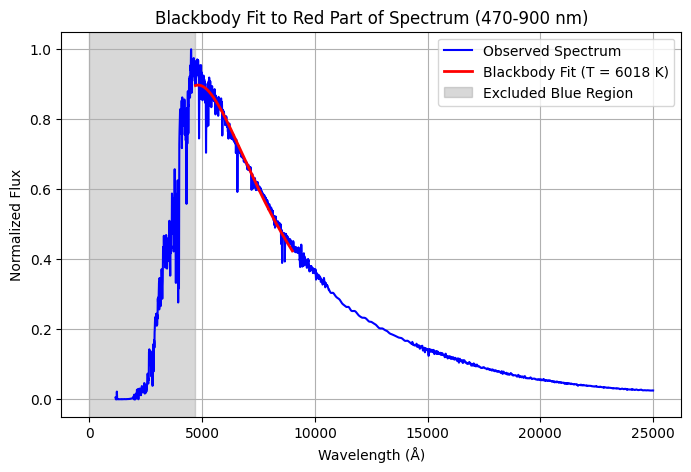

Best-fit Blackbody Temperature (Red Spectrum Only): 6018 K


In [5]:
# Define wavelength range for red part (470 - 900 nm)
red_min, red_max = 470e-9, 900e-9  # Convert to meters

# Apply mask to select only the red part of the spectrum
mask = (wavelength_m >= red_min) & (wavelength_m <= red_max)
wavelength_red = wavelength_m[mask]
flux_red = flux_norm[mask]  # Use normalized flux

# Fit the Planck function to the red spectrum
popt_red, pcov_red = curve_fit(planck, wavelength_red, flux_red, p0=[6000, 1], bounds=([2000, 0.1], [50000, 10]))
T_red, scale_red = popt_red  # Extract best-fit parameters

# Generate Blackbody Curve for Red Spectrum
wavelength_fit_red = np.linspace(red_min, red_max, 500)
blackbody_fit_red = planck(wavelength_fit_red, T_red, scale_red)

# Plot Results
plt.figure(figsize=(8, 5))
plt.plot(wavelength_m * 1e10, flux_norm, label="Observed Spectrum", color="blue")  # Full spectrum
plt.plot(wavelength_fit_red * 1e10, blackbody_fit_red, label=f"Blackbody Fit (T = {T_red:.0f} K)", color="red", lw=2)
plt.axvspan(0, red_min * 1e10, color="gray", alpha=0.3, label="Excluded Blue Region")
plt.xlabel("Wavelength (Å)")
plt.ylabel("Normalized Flux")
plt.title("Blackbody Fit to Red Part of Spectrum (470-900 nm)")
plt.legend()
plt.grid(True)
plt.show()

# Print best-fit temperature for red part
print(f"Best-fit Blackbody Temperature (Red Spectrum Only): {T_red:.0f} K")


3. (1 point) You will notice that the observed stellar spectrum deviates from the BB spectrum on small scales as it has hundreds of absorption lines. What chemical elements produce the strongest lines in the range 4000A<λ<7000A?

In this range, the most prominent absorption features in stellar spectra are due to the following elements:

1. **Hydrogen (H I - Balmer Series)**
2. **Calcium (Ca II - H & K Lines)** (just out of 4000 range so idk if I should mention it)
3. **Sodium (Na I - D Lines)**
4. **Iron (Fe I and Fe II)**
5. **Magnesium (Mg I)**

4. (1 point) Measure the observed wavelength λobs for three prominent (deep) absorption lines, guess
the responsible chemical element(s) and compare λobs with the corresponding wavelength at rest
λrest. From the three diﬀerences λobs−λrest work out three line-of-sight (radial) velocities of the
star and discuss the results.

Absorption Line Analysis:
------------------------------------------------------
Element    λ_obs (Å)    λ_rest (Å)   Radial Velocity (km/s)
------------------------------------------------------
G band     4305.00      4307.74      -190.82             
H-alpha    6560.00      6562.81      -128.45             
Mg         5170.00      5172.70      -156.59             
H-delta    4100.00      4101.75      -127.99             
H-gamma    4340.00      4340.47      -32.48              
H-beta     4860.00      4861.34      -82.69              


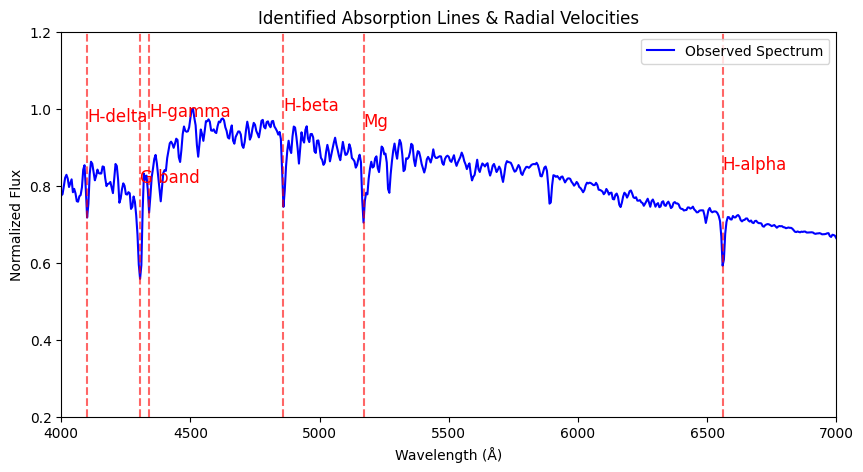

In [28]:
from scipy.signal import find_peaks

# Normalize flux for easier identification of absorption lines
flux = flux / np.max(flux)

# Find local minima (absorption lines)
peaks, _ = find_peaks(-flux, prominence=0.1)  # Negative for absorption features

# Select three deepest absorption lines
deepest_indices = peaks[np.argsort(flux[peaks])[:15]]  # Top 3 most prominent
lambda_obs = wavelength[deepest_indices]

# Known rest-frame wavelengths for common stellar lines (in Å)
known_lines = {
    "H-alpha": 6562.81,
    "H-beta": 4861.34,
    "H-gamma": 4340.47,
    "H-delta": 4101.75,
    "G band": 4307.74,
    "Mg": 5172.70,
    "Na": 5889.95,
}

# Match observed lines to the closest known lines
lambda_rest = []
elements = []
for obs in lambda_obs:
    closest_element = min(known_lines, key=lambda x: abs(known_lines[x] - obs))
    if abs(known_lines[closest_element] - obs) <= 10:
        elements.append(closest_element)
        lambda_rest.append(known_lines[closest_element])
    else:
        elements.append("Unknown")
        lambda_rest.append(np.nan)

# Convert to NumPy arrays
lambda_rest = np.array(lambda_rest)
lambda_obs = np.array(lambda_obs)

# Compute radial velocity for each line
c = 3.0e5  # Speed of light in km/s
radial_velocities = c * (lambda_obs - lambda_rest) / lambda_rest

# Print results
print("Absorption Line Analysis:")
print("------------------------------------------------------")
print(f"{'Element':<10} {'λ_obs (Å)':<12} {'λ_rest (Å)':<12} {'Radial Velocity (km/s)':<20}")
print("------------------------------------------------------")
for i in range(len(elements)):
    if elements[i] != "Unknown" and not np.isnan(radial_velocities[i]):
        print(f"{elements[i]:<10} {lambda_obs[i]:<12.2f} {lambda_rest[i]:<12.2f} {radial_velocities[i]:<20.2f}")

# Plot the spectrum with absorption lines marked
plt.figure(figsize=(10, 5))
plt.plot(wavelength, flux, label="Observed Spectrum", color="blue")
plt.xlim(4000, 7000)
plt.ylim(0.2, 1.2)
#plt.scatter(lambda_obs, flux[deepest_indices], color="red", label="Detected Absorption Lines", zorder=3)
for i in range(len(elements)):
    if elements[i] != "Unknown" and not np.isnan(radial_velocities[i]):
        plt.axvline(lambda_obs[i], linestyle="--", color="red", alpha=0.6)
        plt.text(lambda_obs[i], flux[deepest_indices[i]] + 0.25, elements[i], color="red", fontsize=12)

plt.xlabel("Wavelength (Å)")
plt.ylabel("Normalized Flux")
plt.title("Identified Absorption Lines & Radial Velocities")
plt.legend()
plt.show()


5. (1 point) Plot the the normalised transmission curves of the photometric filters Fblue and Fred in
a graph and show the results.

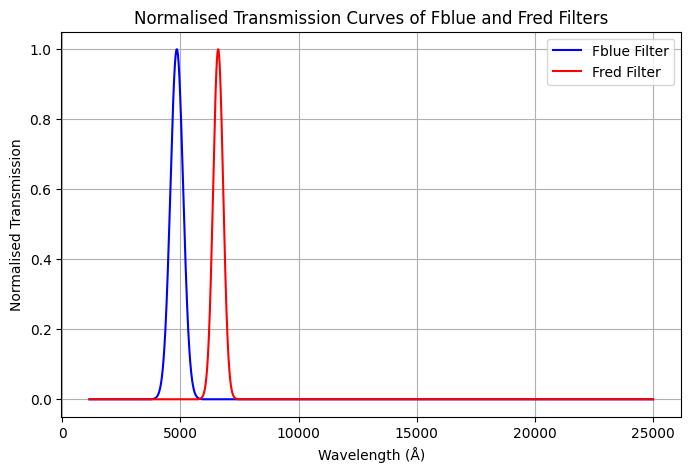

In [17]:
# Extract relevant data
wavelength = df.iloc[:, 0]  # First column is wavelength (Angstroms)
Fblue = df.iloc[:, 2]       # Third column is Fblue
Fred = df.iloc[:, 3]        # Fourth column is Fred

# Plot the normalised transmission curves
plt.figure(figsize=(8, 5))
plt.plot(wavelength, Fblue, color='blue', label='Fblue Filter')
plt.plot(wavelength, Fred, color='red', label='Fred Filter')

# Labels and title
plt.xlabel("Wavelength (Å)")
plt.ylabel("Normalised Transmission")
plt.title("Normalised Transmission Curves of Fblue and Fred Filters")
plt.legend()
plt.grid()

# Show the plot
plt.show()

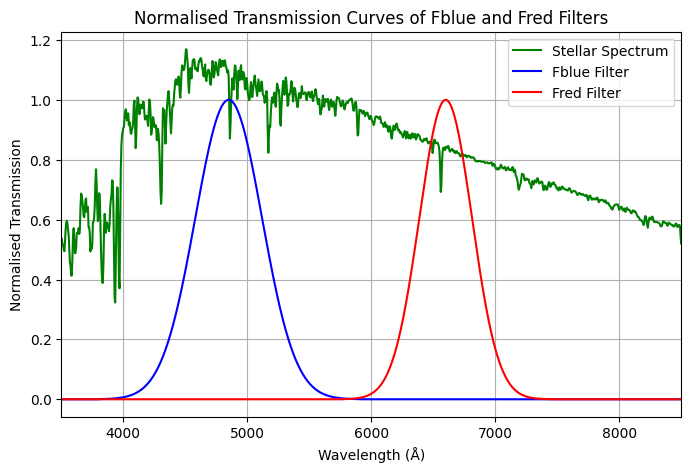

In [18]:
# Extract relevant data
wavelength = df.iloc[:, 0]  # First column: Wavelength in Angstrom
flux = df.iloc[:, 1]        # Second column: Stellar flux (arbitrary units)
Fblue = df.iloc[:, 2]       # Third column is Fblue
Fred = df.iloc[:, 3]        # Fourth column is Fred

# Normalize flux for fitting
flux_norm = flux / np.max(flux)

# Plot the normalised transmission curves
plt.figure(figsize=(8, 5))
plt.plot(wavelength, flux, color='green', label="Stellar Spectrum")
plt.plot(wavelength, Fblue, color='blue', label='Fblue Filter')
plt.plot(wavelength, Fred, color='red', label='Fred Filter')

# Labels and title
plt.xlabel("Wavelength (Å)")
plt.ylabel("Normalised Transmission")
plt.xlim(3500, 8500)
plt.title("Normalised Transmission Curves of Fblue and Fred Filters")
plt.legend()
plt.grid()

# Show the plot
plt.show()

6. (2 points) Convolve (ie. multiply) the stellar spectrum with each filter curve and calculate the total
fluxes fblue and fred you would measure for this star observing with the two filters. Then calculate
the flux ratio fblue/fred and the corresponding mblue−mred colour of the star.

In [19]:
# Extract relevant data
wavelength = df.iloc[:, 0]  # First column: Wavelength (Angstrom)
flux = df.iloc[:, 1]        # Second column: Stellar flux
Fblue = df.iloc[:, 2]       # Third column: Fblue transmission curve
Fred = df.iloc[:, 3]        # Fourth column: Fred transmission curve

# Convert wavelength from Ångströms to meters for consistency
wavelength_m = wavelength * 1e-10  # (1 Å = 10⁻¹⁰ m)

# Compute the convolved fluxes (integrated fluxes under each filter curve)
fblue = np.trapezoid(flux * Fblue, wavelength_m)  # Integration using the trapezoidal rule
fred = np.trapezoid(flux * Fred, wavelength_m)

# Compute the flux ratio
flux_ratio = fblue / fred

# Compute the color index (m_blue - m_red)
color_index = -2.5 * np.log10(flux_ratio)

# Print results
print(f"Total Flux in Fblue: {fblue:.5e}")
print(f"Total Flux in Fred: {fred:.5e}")
print(f"Flux Ratio (fblue/fred): {flux_ratio:.5f}")
print(f"Color Index (mblue - mred): {color_index:.5f}")


Total Flux in Fblue: 7.12230e-08
Total Flux in Fred: 4.43785e-08
Flux Ratio (fblue/fred): 1.60490
Color Index (mblue - mred): -0.51362


## 3. Colour-Magnitude Diagram of Globular Cluster M15

1. (2 points) Download the file M15.csv from Wattle. The four columns are the sky coordinates
(raMean, decMean) and g and i-band magnitudes (gMeanPSFMag, iMeanPSFMag) for more than
20,000 stars detected in M15. Make a graph of the M15 CMD with your favourite plotting tool.
The graph has to be presented in the correct way Astrophysicists do. Before you make the plot you
need to understand what the value ”-999” in the photometry columns means.

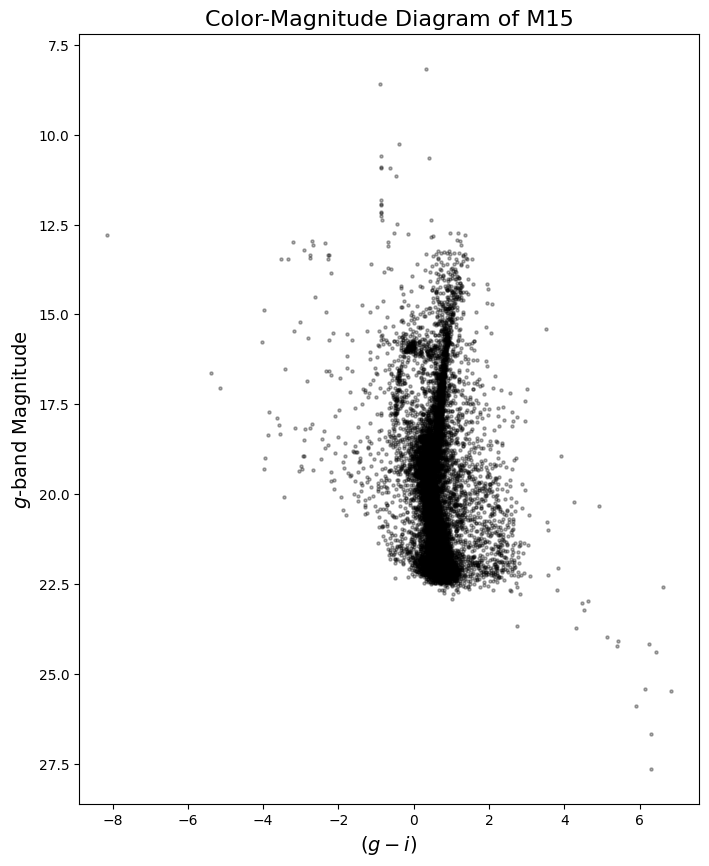

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the M15 data
file_path = "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/M15.csv"
df = pd.read_csv(file_path)

# Extract photometric data
raMean = df["raMean"]
decMean = df["decMean"]
g_mag = df["gMeanPSFMag"]
i_mag = df["iMeanPSFMag"]

# Remove invalid (-999) values
valid_data = (g_mag != -999) & (i_mag != -999)
g_mag = g_mag[valid_data]
i_mag = i_mag[valid_data]

# Compute the color index (g - i)
color_index = g_mag - i_mag

# Setting color scale based on g-band magnitude
plt.figure(figsize=(8, 10))
sc = plt.scatter(color_index, g_mag, color='black', s=5, alpha=0.3) 

# Inverting y-axis (brighter stars at the top)
plt.gca().invert_yaxis()

# Labels and title
plt.xlabel(r"$(g - i)$", fontsize=14)
plt.ylabel(r"$g$-band Magnitude", fontsize=14)
plt.title("Color-Magnitude Diagram of M15", fontsize=16)

# Show the plot
plt.show()


2. (2 points) There are at least seven dense concentrations of stars in the CMD of M15. Those are
key features of stellar evolution. Label them.

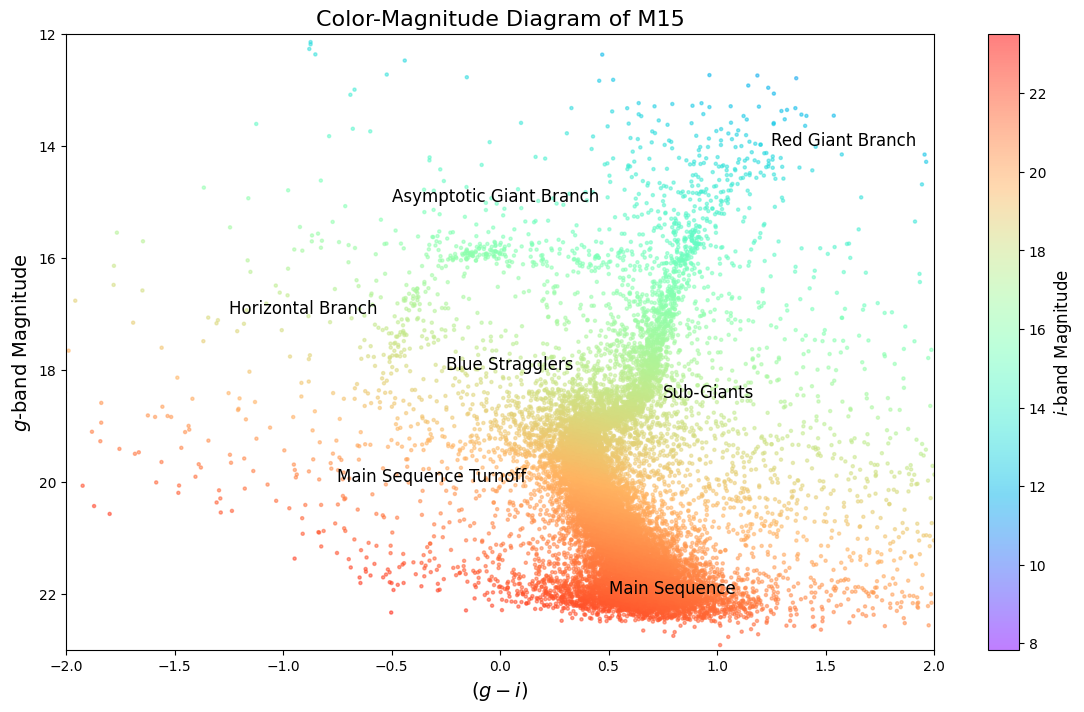

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the M15 data
file_path = "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/M15.csv"
df = pd.read_csv(file_path)

# Extract photometric data
raMean = df["raMean"]
decMean = df["decMean"]
g_mag = df["gMeanPSFMag"]
i_mag = df["iMeanPSFMag"]

# Remove invalid (-999) values
valid_data = (g_mag != -999) & (i_mag != -999)
g_mag = g_mag[valid_data]
i_mag = i_mag[valid_data]

# Compute the color index (g - i)
color_index = g_mag - i_mag

# Setting color scale based on g-band magnitude
plt.figure(figsize=(14, 8))
sc = plt.scatter(color_index, g_mag, c=i_mag, cmap='rainbow', s=5, alpha=0.5) 

# Inverting y-axis (brighter stars at the top)
plt.gca().invert_yaxis()

# Labels and title
plt.xlabel(r"$(g - i)$", fontsize=14)
plt.ylabel(r"$g$-band Magnitude", fontsize=14)
plt.xlim(-2, 2)
plt.ylim(23, 12)
plt.title("Color-Magnitude Diagram of M15", fontsize=16)

# Label key evolutionary features
plt.text(0.5, 22, "Main Sequence", fontsize=12, color="black")
plt.text(-0.25, 18, "Blue Stragglers", fontsize=12, color="black")
plt.text(-0.75, 20, "Main Sequence Turnoff", fontsize=12, color="black")
plt.text(0.75, 18.5, "Sub-Giants", fontsize=12, color="black")
plt.text(1.25, 14, "Red Giant Branch", fontsize=12, color="black")
plt.text(-0.5, 15, "Asymptotic Giant Branch", fontsize=12, color="black")
plt.text(-1.25, 17, "Horizontal Branch", fontsize=12, color="black")

# Add color bar
cbar = plt.colorbar(sc)
cbar.set_label(r"$i$-band Magnitude", fontsize=12)

# Show the plot
plt.show()


3. (2 points) Make a rough estimate of the distance modulus of M15 by using the mean g-magnitude
of the red horizontal branch (RHB) stars, adopting a Galactic extinction value of Ag = 0.2 in the
direction of M15, adopting a metallicity of [Fe/H]=−2.20, and using the absolute g-magnitude for
RHB stars listed in the Table shown in Figure 2.

4. (2 points) Estimate the total apparent g-band magnitude of the entire globular cluster with
the following recipe: (i) discard all stars with g-mag=-999, (ii) convert the g-magnitudes of the
remaining stars into fluxes (ok to us an arbitrary unit), (iii) add the fluxes up, (iv) convert the total
flux back into a g-magnitude.

In [ ]:
# Step 1: Remove invalid g-band magnitudes (-999)
valid_data = (df["gMeanPSFMag"] != -999)
df = df[valid_data]

# Step 2: Convert g-band magnitudes to fluxes (arbitrary units)
df["flux"] = 10**(-0.4 * df["gMeanPSFMag"])

# Step 3: Sum all fluxes
total_flux = df["flux"].sum()

#Print the total flux
print(f"Total flux of M15: {total_flux:.2e}")

# Step 4: Convert total flux back to g-magnitude
g_total = -2.5 * np.log10(total_flux)

# Print result
print(f"Estimated total apparent g-band magnitude of M15: {g_total:.2f}")


Total flux of M15: 2.67e-03
Estimated total apparent g-band magnitude of M15: 6.44


## 4 The Initial Mass Function

The Initial Mass Function (IMF, ξ(M) ∝M−α) is the frequency distribution of the masses of a large
number of stars when they form at the same time in an open star cluster. It can be used to calculate
some interesting properties of newly formed stellar populations. For this exercise assume a slope α= 2.35
with lower and upper mass bounds given by 0.1 M⊙ <M <120 M⊙.

a. (2 points): Calculate the percentage of stars born with masses larger than 4 M⊙.

In [ ]:
import scipy.integrate as spi

# Define the IMF function
def imf(M, alpha=2.35):
    return M**(-alpha)

# Mass limits
M_min = 0.1  # Lower bound (M_sun)
M_max = 120  # Upper bound (M_sun)
M_thresh = 4  # Threshold mass

# Integrate IMF over full range (0.1 M_sun to 120 M_sun)
N_total, _ = spi.quad(imf, M_min, M_max)

# Integrate IMF for M > 4 M_sun
N_massive, _ = spi.quad(imf, M_thresh, M_max)

# Percentage of stars born with M > 4 M_sun
percentage_massive = (N_massive / N_total) * 100

print(f"Percentage of stars born with M > 4 M⊙: {percentage_massive:.2f}%")


Percentage of stars born with M > 4 M⊙: 0.68%


b. (1 points): What fraction of the stellar mass is in stars of main-sequence type A0V (M = 2.18 M⊙) and less massive?

In [ ]:
# Define the mass-weighted IMF function
def mass_weighted_imf(M, alpha=2.35):
    return M * M**(-alpha)  # = M^(1-alpha)

# Mass threshold for A0V stars
M_A0V = 2.18  # M_sun

# Integrate IMF * M over full range (total mass)
total_mass, _ = spi.quad(mass_weighted_imf, M_min, M_max)

# Integrate IMF * M over M <= 2.18 M_sun
mass_low, _ = spi.quad(mass_weighted_imf, M_min, M_A0V)

# Fraction of mass in stars with M ≤ 2.18 M_sun
fraction_mass_low = mass_low / total_mass

print(f"Fraction of total stellar mass in M ≤ 2.18 M⊙ stars: {fraction_mass_low:.2f}")


Fraction of total stellar mass in M ≤ 2.18 M⊙ stars: 0.72


c. (1 points): Calculate the fraction of light emitted by the M >7 M⊙ stars, assuming that luminosity
scales as L∝M3.5.

In [ ]:
import scipy.integrate as spi
import numpy as np

# Define the IMF power-law slope
alpha = 2.35

# Luminosity scaling power
beta = 3.5  

# Mass range
M_min = 0.1  
M_max = 120  
M_cutoff = 7  

# Define the IMF-weighted luminosity function
def lum_function(M):
    return M**(beta - alpha)  # Since IMF ∝ M^(-alpha) and L ∝ M^beta

# Integrate for total luminosity
L_total, _ = spi.quad(lum_function, M_min, M_max)
# Integrate for luminosity from M > 7 M☉ stars
L_highmass, _ = spi.quad(lum_function, M_cutoff, M_max)

# Compute the fraction of light
fraction_L = L_highmass / L_total

print(f"Fraction of total light from M > 7 M☉ stars: {fraction_L:.3f}")


Fraction of total light from M > 7 M☉ stars: 0.998


## 5 Cepheids as distance indicators

Measuring distances to astronomical objects is a fundamental task in astrophysics. Over the years a number of diﬀerent methods have been developed. One of them is the use of Cepheid variable stars as
standard candles. Cepheids are rare, luminous stars that have a regularly varying luminosity. They are named after the star δ-Cephei in the constellation of Cepheus, which was the first known example of this
particular type of stars. The Period-Luminosity (P-L) relation for Cepheid variables has been discovered by American astronomer Henrietta Leavitt in 1912. It is a relation between the mean absolute V-band
magnitude (MV) of the star and its pulsation period P measured in days.

a. (2 points) Table 1 contains data for 10 Cepheids for which we know the mean apparent V-magnitude, the parallax measured by the Gaia satellite, and the light curve period. Make a MV versus P diagram (P on log10 scale) that shows the P-L relationship. Work out a simply analytical expression that best describes the P-L relation and overplot it in the graph.

Absolute Magnitudes: [-5.66824701 -6.0240535  -5.95833116 -5.30184916 -4.08820209 -5.45583142
 -5.54275001 -4.48101448 -6.10392071 -5.06460778]


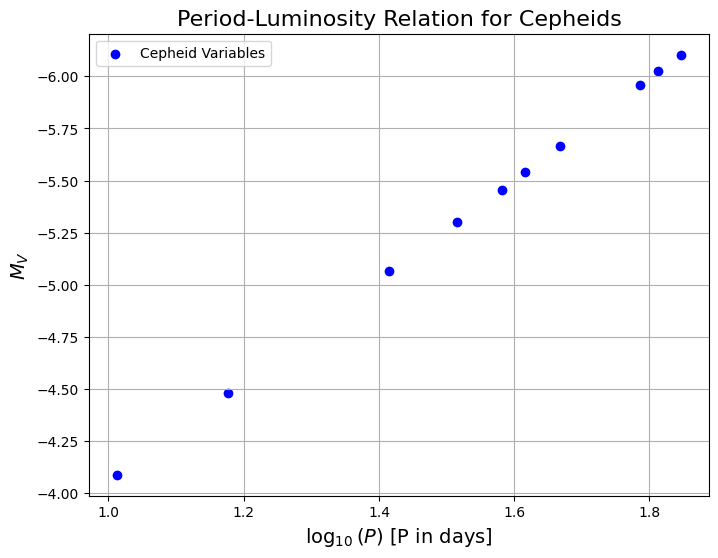

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data from Table 1
periods = np.array([46.5, 65.0, 61.2, 32.8, 10.3, 38.2, 41.3, 15.0, 70.2, 26.0])  # in days
mV = np.array([8.46, 13.87, 13.39, 13.15, 9.05, 12.52, 11.70, 2.47, 12.05, 14.67])
parallax = np.array([0.0001494, 0.0000105, 0.0000135, 0.0000204, 0.0002357, 
                     0.0000254, 0.0000356, 0.0040719, 0.0000234, 0.0000113])  # in arcsec

# Convert parallax to distance in parsecs (d = 1 / parallax)
distances = 1 / parallax

# Calculate absolute magnitude using distance modulus: M = m - 5 log10(d/10)
Mv = mV - 5 * np.log10(distances / 10)

print('Absolute Magnitudes:', Mv)

# Convert periods to log scale
logP = np.log10(periods)

# Plotting the Period-Luminosity relation
plt.figure(figsize=(8, 6))
plt.scatter(logP, Mv, color='blue', label='Cepheid Variables')

plt.xlabel(r'$\log_{10}(P)$ [P in days]', fontsize=14)
plt.ylabel(r'$M_V$', fontsize=14)
plt.title('Period-Luminosity Relation for Cepheids', fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis as magnitudes are negative for brighter stars
plt.legend()
plt.grid(True)
plt.show()


b. (2 points) The Hubble Space Telescope has monitored six Cepheid stars in the direction of the galaxy M100 and measured their time-dependent photometry (see graphs in Fig. 3). Measure the
mean apparent Vmagnitude ⟨mV⟩and period P (accuracy to 2 decimal places) for each of the six stars.

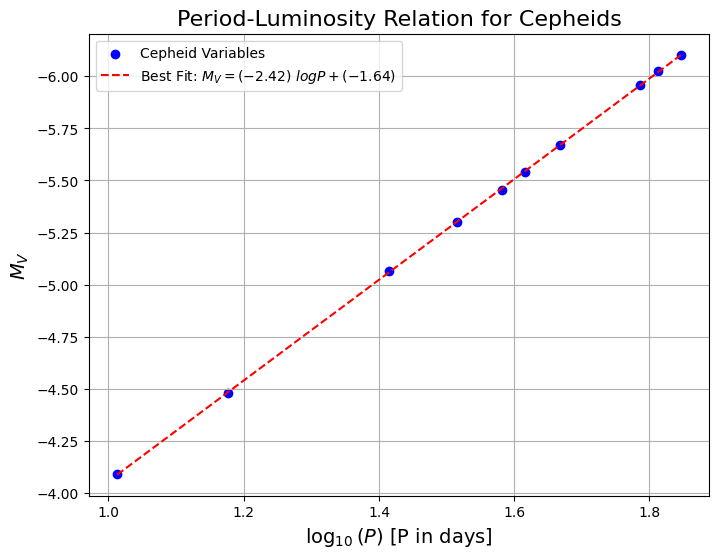

In [ ]:
from scipy.optimize import curve_fit

# Define linear function for fitting
def linear_fit(logP, a, b):
    return a * logP + b

# Fit the P-L relation using least squares fitting
params, covariance = curve_fit(linear_fit, logP, Mv)
a_fit, b_fit = params  # Extract fitted parameters

# Generate line for best-fit model
logP_fit = np.linspace(min(logP), max(logP), 100)
Mv_fit = linear_fit(logP_fit, a_fit, b_fit)

# Plot data points
plt.figure(figsize=(8, 6))
plt.scatter(logP, Mv, color='blue', label='Cepheid Variables')
plt.plot(logP_fit, Mv_fit, color='red', linestyle='--', label=f'Best Fit: $M_V = ({a_fit:.2f}) \\ log P + ({b_fit:.2f})$')

plt.xlabel(r'$\log_{10}(P)$ [P in days]', fontsize=14)
plt.ylabel(r'$M_V$', fontsize=14)
plt.title('Period-Luminosity Relation for Cepheids', fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis since magnitudes are lower for brighter stars
plt.legend()
plt.grid(True)
plt.show()


c. (1 point) Assuming all six Cepheids are located in M100, calculate the mean distance to the galaxy (with uncertainty from scatter in the six independent results) using the P-L relation you established in part a.

In [ ]:
import numpy as np

# Given P-L relation: M_V = -2.42 logP - 1.64
def compute_MV(P):
    return -2.42 * np.log10(P) - 1.64

# Given data for six Cepheids (mean apparent magnitudes and periods in days)
cepheid_mean_mv = np.array([ 24.925, 25.375, 25.725, 25.475, 26.425, 26.450])
cepheid_period = np.array([53, 48, 42, 39, 30.5, 28.5])

# Compute absolute magnitudes M_V
P_values = cepheid_period
MV_values = compute_MV(P_values)

# Compute distances using distance modulus formula
mV_values = cepheid_mean_mv
distances = 10 ** ((mV_values - MV_values + 5) / 5)  # Distance in parsecs

# Compute mean distance and standard deviation (uncertainty)
mean_distance = float(np.mean(distances))/1e6 #Mpc
std_distance = float(np.std(distances))/1e6 #Mpc

mean_distance, std_distance


(17.783484934358775, 2.718814105650583)